In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Q.1 We'll be working with the 120 years of Olympic History dataset. Download the dataset “athlete_events.csv” and perform the following.

#### (a) Filter the DataFrame to only include the rows corresponding to medal winners from 2016. (In other words, drop the rows if 'Medal'==NaN

In [2]:
df = pd.read_csv("athlete_events.csv")
df = df.dropna(subset=['Medal'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


#### (b) Find out the number of medals awarded in 2016 for each sport.

In [3]:
df[df["Year"] == 2016].groupby(['Sport'])['Medal'].count()

Sport
Archery                   24
Athletics                192
Badminton                 24
Basketball                72
Beach Volleyball          12
Boxing                    51
Canoeing                  82
Cycling                   84
Diving                    36
Equestrianism             45
Fencing                   65
Football                 106
Golf                       6
Gymnastics                66
Handball                  89
Hockey                    99
Judo                      56
Modern Pentathlon          6
Rhythmic Gymnastics       18
Rowing                   144
Rugby Sevens              74
Sailing                   45
Shooting                  45
Swimming                 191
Synchronized Swimming     32
Table Tennis              24
Taekwondo                 32
Tennis                    24
Trampolining               6
Triathlon                  6
Volleyball                72
Water Polo                78
Weightlifting             45
Wrestling                 72
Name: Me

#### (c) Filter the DataFrame one more time to only include the records for the top five sports based on the number of medals in 2016. 

In [9]:
top5 = df[df["Year"] == 2016]
top5 = top5.groupby(['Sport'])['Medal'].count().nlargest(5)
names = []
for sport in top5.index:
    names.append(sport)
    
top5df = df[df['Sport'].isin(names)]
top5df = top5df[top5df['Year'] == 2016]
top5df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265312,132776,Julius Kiplagat Yego,M,27.0,175.0,94.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Javelin Throw,Silver
267136,133648,Shelina Laura Zadorsky,F,23.0,172.0,67.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
268247,134211,Jos Carlos Cracco Neto,M,22.0,170.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
268944,134559,Zhang Wenxiu,F,30.0,183.0,105.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Silver


#### (d) Generate a bar plot of record counts corresponding to each of the top five sports. The graph should look like this.

<AxesSubplot:xlabel='Sport'>

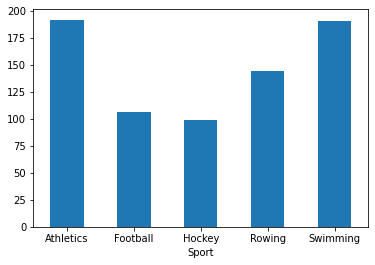

In [200]:
barCount = top5df.groupby(['Sport'])['Medal'].count()
barCount.plot.bar(x=top5df['Sport'], y=top5df['Medal'], rot=0)

#### (e) Generate a histogram for the “Age” of all medal winners in the top five sports (2016). The graph should look like this.

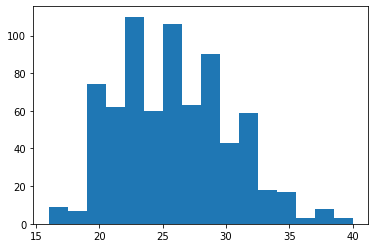

In [190]:
e = plt.hist(top5df['Age'], bins=16)

#### (f)  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016. The output should look like this.

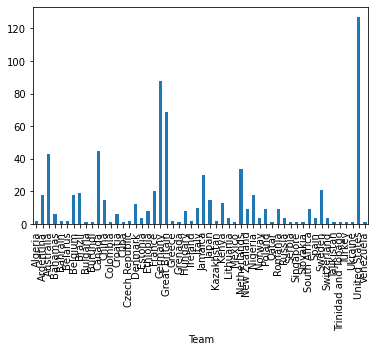

In [139]:
countryMedal = top5df.groupby(['Team'])['Medal'].count()
f = countryMedal.plot.bar()

#### (g) Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016. The output should look like this.

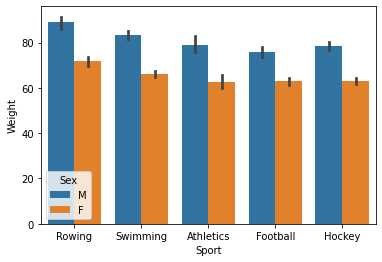

In [174]:

g = sns.barplot(x=top5df['Sport'], y=top5df['Weight'], hue=top5df['Sex'], data=top5df)



#### (h) Create a scatter plot with x=height and y=weight.

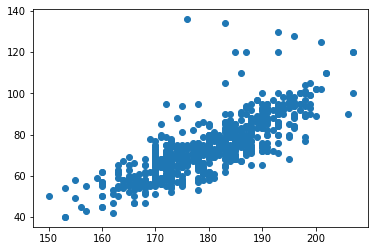

In [137]:
h = plt.scatter(x=top5df['Height'], y=top5df['Weight'])

#### (i)  create a joint plot with x=height and y=weight.

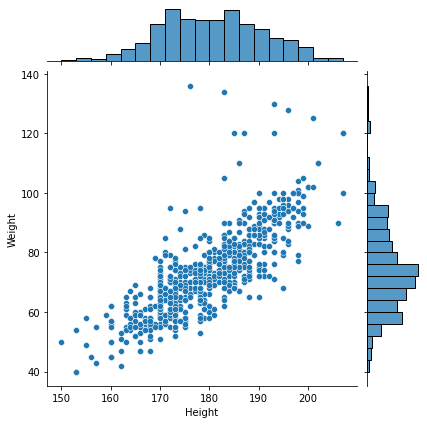

In [136]:
i = sns.jointplot(x=top5df['Height'], y=top5df['Weight'])

#### (j)  Create two violin plots: One for the distribution of weight by genders and the classes of medals.The other for the distribution of height by genders and the classes of medals.

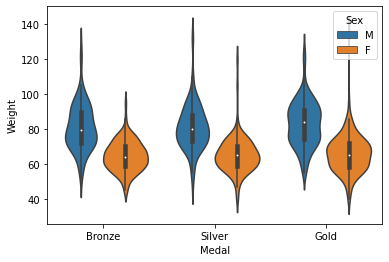

In [189]:
j = sns.violinplot(x=top5df['Medal'], y=top5df['Weight'], hue=top5df['Sex'], data=top5df)

### Q.2 We will work with the HPI dataset. The objective is to draw a bar plot depicting the number of countries in each region and a heatmap indicating the number of countries in various ranges of wellbeing and life-expectancy. 

#### (a) Read from the dataset "hpi_data_countries.txt" (it is txt file separated by \t). You can use pandas to read it.

In [476]:
hpi_df = pd.read_csv('hpi_data_countries.txt', sep='\t')
hpi_df

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3
...,...,...,...,...,...,...,...,...
135,136,Mongolia,Asia Pacific,68.6,4.9,22%,6.1,14.3
136,137,Benin,Sub Saharan Africa,59.2,3.2,44%,1.4,13.4
137,138,Togo,Sub Saharan Africa,58.6,2.9,43%,1.1,13.2
138,139,Luxembourg,Europe,81.1,7.0,7%,15.8,13.2


#### (b) Count the number of rows for each region to generate the following bar chart.

<AxesSubplot:xlabel='Region'>

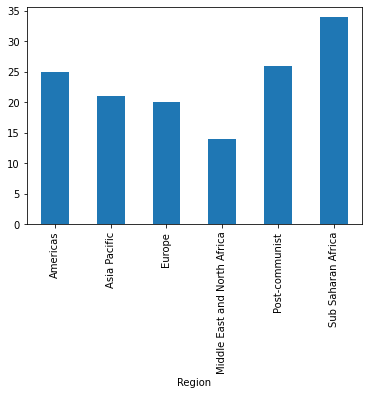

In [477]:
region_count = hpi_df.groupby("Region")["Region"].count()
region_count.plot.bar()

#### (c) we use pd.cut to bin the values into different categories. Then, generate the following heatmap.

<AxesSubplot:xlabel='Wellbeing (0-10)(binned)', ylabel='Life Expectancy (years)(binned)'>

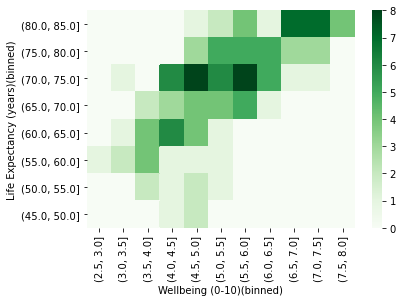

In [520]:
hpi_df["Wellbeing (0-10)(binned)"] = pd.cut(hpi_df["Wellbeing (0-10)"], bins=np.linspace(2.5,8,12))
hpi_df["Life Expectancy (years)(binned)"] = pd.cut(hpi_df["Life Expectancy (years)"], bins=np.linspace(45,85,9))

new_df = hpi_df.groupby(["Wellbeing (0-10)(binned)", "Life Expectancy (years)(binned)"]).size().unstack(level=0)
new_df = new_df.sort_values(ascending=False, by="Life Expectancy (years)(binned)")

sns.heatmap(new_df, cmap="Greens")